In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
# Downloading and making the model usable
mp_holistic = mp.solutions.holistic 

# To draw the keypoints on the face and keep track of it
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # Color convertion BGR to RGB
    image.flags.writeable = False                 # Image is no longer writable
    results = model.process(image)                # Making Prediction using the image captured by the camera
    image.flags.writeable = True                  # Makes the image writable again
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # Color convertion RGB to BGR
    return image,results

In [10]:
cv2.cvtColor??

In [4]:
def draw_landmarks(image,results):
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image,results):
    # Draw face connections
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                               mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                               mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               ) 
     # Draw pose connections
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                               )
     # Draw left hand connections
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                               )
     # Draw right hand connections
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                               ) 

In [38]:
mp_holistic.POSE_CONNECTIONS

In [37]:
mp_drawing.draw_landmarks??

In [36]:
# to capture and use the webcam
cap=cv2.VideoCapture(0)
# detection confi is the initial detection like where the the detection starts 
# and tracking is to make sure how the trace goes from the main line and further where can be changed accoringly to achive the sutable model 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        if not ret:
            break
        
        # Make detections
        image, results=mediapipe_detection(frame,holistic)
        print(results)
        
        
        # Draw Landmarks
        draw_styled_landmarks(image,results)
        
        # Show to screen
        cv2.imshow('my webcam',image)
        
        # breaking the frames
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()
    

c:\Users\sathy\Projects\Sign-Language-Detection\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [37]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
draw_styled_landmarks(frame,results)

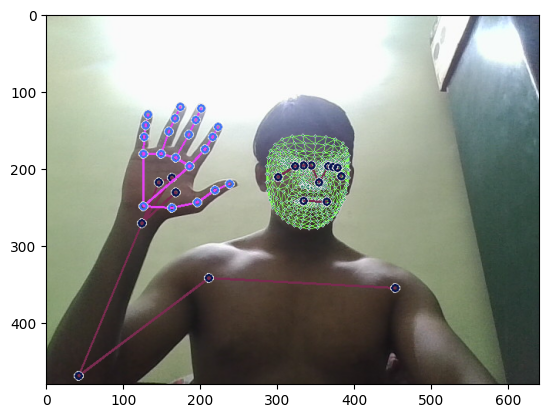

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extracting the key points


In [10]:
results.pose_landmarks

landmark {
  x: 0.55353
  y: 0.456116766
  z: -0.707818747
  visibility: 0.999923289
}
landmark {
  x: 0.572345376
  y: 0.412057817
  z: -0.640335858
  visibility: 0.999813497
}
landmark {
  x: 0.58253026
  y: 0.413319319
  z: -0.640173852
  visibility: 0.999709845
}
landmark {
  x: 0.592142224
  y: 0.415296406
  z: -0.640296817
  visibility: 0.999784529
}
landmark {
  x: 0.538354278
  y: 0.408969492
  z: -0.637974381
  visibility: 0.999859929
}
landmark {
  x: 0.522851944
  y: 0.409066796
  z: -0.637709
  visibility: 0.999830902
}
landmark {
  x: 0.50566119
  y: 0.411386102
  z: -0.637993932
  visibility: 0.999903619
}
landmark {
  x: 0.598662674
  y: 0.438447595
  z: -0.289455414
  visibility: 0.99962467
}
landmark {
  x: 0.470392317
  y: 0.440172344
  z: -0.266596973
  visibility: 0.999876559
}
landmark {
  x: 0.569861293
  y: 0.50629586
  z: -0.5900172
  visibility: 0.999876261
}
landmark {
  x: 0.522747278
  y: 0.504661202
  z: -0.584890962
  visibility: 0.999928713
}
landmark {
 

In [38]:
results.left_hand_landmarks.landmark

[x: 0.873449206
y: 0.686572075
z: 3.55238598e-007
, x: 0.806375504
y: 0.65863204
z: -0.023091739
, x: 0.744761825
y: 0.6079036
z: -0.0336692408
, x: 0.697188497
y: 0.56692785
z: -0.0437969267
, x: 0.65462786
y: 0.549014151
z: -0.0536515154
, x: 0.785101652
y: 0.466384381
z: -0.0100964047
, x: 0.752586246
y: 0.385752439
z: -0.0224234555
, x: 0.737698674
y: 0.335241258
z: -0.0343143456
, x: 0.728199542
y: 0.291692436
z: -0.0447217524
, x: 0.831617
y: 0.445784271
z: -0.0146011058
, x: 0.808217168
y: 0.35007605
z: -0.0235692989
, x: 0.795737267
y: 0.291579783
z: -0.0347992778
, x: 0.785937846
y: 0.245162
z: -0.0445048548
, x: 0.880253613
y: 0.4500314
z: -0.0238053687
, x: 0.876685202
y: 0.360568553
z: -0.039879214
, x: 0.872468174
y: 0.30282414
z: -0.0539117493
, x: 0.866781116
y: 0.251918554
z: -0.0645538867
, x: 0.928642213
y: 0.474676073
z: -0.0353378952
, x: 0.954950035
y: 0.413286239
z: -0.0520923771
, x: 0.968594432
y: 0.368686974
z: -0.0616726242
, x: 0.978853166
y: 0.324272484
z: -

# Extract key points

In [14]:
results.pose_landmarks.landmark[0].visibility

0.9999232888221741

# Pose


In [130]:
len(results.pose_landmarks.landmark)

33

In [106]:
landmarks_list = []

# Check if left hand landmarks are available
if results.pose_landmarks:
    # Iterate over each landmark
    for res in results.pose_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z,res.visibility])
    
    # Convert the list to a NumPy array
    pose = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    pose = np.zeros(33*4)

In [123]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [100]:
# pose=np.zeros(132)
# pose.shape

(132,)

In [124]:
pose.shape


(132,)

# Left hand


In [131]:
len(results.left_hand_landmarks.landmark)

21

In [77]:

landmarks_list = []

# Check if left hand landmarks are available
if results.left_hand_landmarks:
    # Iterate over each landmark
    for res in results.left_hand_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z])
    
    # Convert the list to a NumPy array
    lh = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    lh = np.zeros(21 * 3)

In [118]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten()if results.left_hand_landmarks else np.zeros(21*3)

In [119]:
lh.shape

(63,)

# Right hand

* same as left hand 
left=right

In [82]:

landmarks_list = []

# Check if left hand landmarks are available
if results.left_hand_landmarks:
    # Iterate over each landmark
    for res in results.left_hand_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z])
    
    # Convert the list to a NumPy array
    rh = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    rh = np.zeros(21 * 3)

In [85]:
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [88]:
rh.shape

(63,)

* Even if the left or right hand is not shown in the camera the program should not throw a error so to handle that we are going to create a blank array with zeros to avoid error 

# Face

In [ ]:
len(results.face_landmarks.landmark)


468

In [140]:

landmarks_list = []

# Check if left hand landmarks are available
if results.face_landmarks:
    # Iterate over each landmark
    for res in results.face_landmarks.landmark:
        
        landmarks_list.append([res.x, res.y, res.z])
    
    # Convert the list to a NumPy array
    face = np.array(landmarks_list).flatten()
else:
    # If no landmarks are available, create a zero-filled array
    face = np.zeros(468*3)

In [142]:
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [143]:
face

array([ 0.56024599,  0.45432317, -0.03333274, ...,  0.62729985,
        0.35129201,  0.02735811])

# Converting the key point into a function one

In [144]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten()if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face,lh,rh])

In [147]:
extract_keypoints(results).shape

(1662,)

# 4.Setup Folders for Collection